# Two Traveling Salespeople

Points: 10

## Two-person Version of the [Traveling Salesman Problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem)

* __Goal:__ Find the two tours which collectively visit each of $n$ cities exactly once and return back to the same starting city. Given are pairwise distances between cities, where $d_{i,j}$ is the distance from city $i$ to city $j$.

* __State space:__ Each state represents a pair of tours, where the first element of the pair are the cities to visit for the first person and the second element are the cities to visit for the second person. The cities are numbered and the tours can be expressed a pair of vectors $(\pi_1, \pi_2)$ with the order in which the cities are visited. That is, $\pi_i(1)$ is the index of the first city to visit by the $i$th person ($i$ either is 1 or 2), $\pi_i(2)$ the index of the second city to visit by the $i$th person, and so on.

* __Objective function:__ Minimize the maximum tour length for both people. Informally, the cities should be divided up roughly evenly between the two people so that neither one has a tour that is too long.

The optimization problem is to find the optimal pair of tours $\pi_1^*$ and $\pi_2^*$ through the $n$ cities and which return to the start cities of each tour:

  > minimize: $\max(\mathrm{tourlength}(\pi_1), \mathrm{tourlength}(\pi_2))$
  where $\mathrm{tourlength}(\pi_i) = d_{\pi_i(n),\pi_i(1)} + \sum_{j = 1}^{n-1} d_{\pi_i(j),\pi_i(j+1)}$
  >
  > subject to: every city must be visited exactly once


## Helper functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

np.set_printoptions(precision=2)

np.random.seed(0) # make the results repeatable

In [2]:
def random_tour_pair(n):
    """Create two random tours with n cities"""

    tour = list(range(n))
    np.random.shuffle(tour)

    split_index = np.random.randint(0, n-1)
    tour1 = tour[:split_index]
    tour2 = tour[split_index:]

    return tour1, tour2

random_tour_pair(10)

([2, 8, 4, 9], [1, 6, 7, 3, 0, 5])

In [13]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

def random_tsp(n):
    """
    Create a random (Euclidean) traveling salesman problem. Choose n points randomly in a 1 x 1 unit square and calulates a
    pairwise Euclidean distance matrix.
    """

    pos = pd.DataFrame({
        "x" : np.random.uniform(size = n),
        "y" : np.random.uniform(size = n)
    })

    dist = squareform(pdist(pos))
    return({"pos": pos, "dist": dist})

tsp = random_tsp(10)

print(f"Positions:\n{tsp['pos']}")
print(f"Distance matrix:\n{pd.DataFrame(tsp['dist'])})")

Positions:
          x         y
0  0.984042  0.508315
1  0.260341  0.166848
2  0.537023  0.779051
3  0.447926  0.864933
4  0.099569  0.411397
5  0.352312  0.139973
6  0.469249  0.033222
7  0.841140  0.982575
8  0.904648  0.373291
9  0.037559  0.420075
Distance matrix:
          0         1         2         3         4         5         6  \
0  0.000000  0.800215  0.522613  0.643892  0.889767  0.731273  0.700518   
1  0.800215  0.000000  0.671823  0.722850  0.292663  0.095817  0.247989   
2  0.522613  0.671823  0.000000  0.123749  0.571433  0.665236  0.748902   
3  0.643892  0.722850  0.123749  0.000000  0.571881  0.731239  0.831984   
4  0.889767  0.292663  0.571433  0.571881  0.000000  0.370877  0.528847   
5  0.731273  0.095817  0.665236  0.731239  0.370877  0.000000  0.158335   
6  0.700518  0.247989  0.748902  0.831984  0.528847  0.158335  0.000000   
7  0.495321  1.001369  0.365936  0.410435  0.936041  0.974131  1.019595   
8  0.156637  0.676572  0.547531  0.671049  0.805980  0.

In [15]:
def tour_pair_max_length(tsp, tour_pair):
   """Calculate the maximum length of a pair of tours, i.e., the objective function."""

   tour0_len = tour_length(tsp, tour_pair[0])
   tour1_len = tour_length(tsp, tour_pair[1])

   return max(tour0_len, tour1_len)

def tour_length(tsp, tour):
    """Caclulate the length of a single tour"""

    # make sure tour is a Python list (not an array or a numpy.array)
    if not isinstance(tour, list): tour = tour.tolist()

    tl = 0
    dist = tsp["dist"]
    if len(tour)<=1:
        return 0
    for i in range(len(tour)-1):
        tl += dist[tour[i], tour[i+1]]

    tl += dist[tour[-1], tour[0]]

    return(tl)

np.random.seed(0) # make the results repeatable
tour_pair = random_tour_pair(10)
print(f"objective value: {tour_pair_max_length(tsp, tour_pair)}")

objective value: 3.6008715348010982


Tour length (red): 1.9
Tour length (blue): 2.88


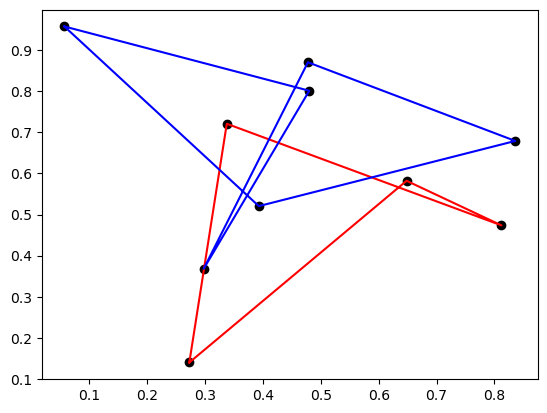

In [5]:
def show_2tsp(tsp, tour_pair = None):
    """display the twoperson traveling salesman problem and a tour pair."""

    pos = tsp["pos"]

    plt.scatter(pos["x"], pos["y"], color='black')

    if tour_pair is not None:
      colors = ['red', 'blue']

      for tour, color in zip(tour_pair, colors):
        # make sure tour is a Python list (not an array or a numpy.array)
        if not isinstance(tour, list): tour = tour.tolist()

        print(f"Tour length ({color}): {round(tour_length(tsp, tour), 2)}")
        tour_x_list = [pos.loc[i, 'x'] for i in tour]
        tour_y_list = [pos.loc[i, 'y'] for i in tour]

        # wrap back to start
        tour_x_list.append(tour_x_list[0])
        tour_y_list.append(tour_y_list[0])

        plt.plot(tour_x_list, tour_y_list, color)

    plt.show()

show_2tsp(tsp, tour_pair)

## Steepest-ascent Hill Climbing Search [2 Points]

Come up with reasonable definition for local moves and explain it in text. Implement a steepest-ascent hill climbing strategy. Measure and report the performance of this on 50 random problem instances. Report the average objective function reached over all problem instances, as well as the average number of local moves analyzed.

In [23]:
# Start State: predefined random tour
# Local moves:
# 1. Move one point from a tour to the end of the other tour
# 2. Swap a pair of points in the order of a tour

def generate_states(tour_pair):
    states = []
    tour1 = tour_pair[0]
    tour2 = tour_pair[1]
    # get states for action 1 
    for i in range(len(tour1)):
        t1 = tour1[0:i]+tour1[i+1:]
        t2 = tour2+[tour1[i]]
        states.append((t1,t2))
    for i in range(len(tour2)):
        t2 = tour2[0:i]+tour2[i+1:]
        t1 = tour1+[tour2[i]]
    # get states for action 2
    if len(tour1)>=2:
        for i in range(len(tour1)-1):
            for j in range(i+1,len(tour1)):
                sub1 = tour1[i]
                sub2 = tour1[j]
                t1 = tour1
                t1[i]=sub2
                t1[j]=sub1;
                states.append((t1,tour2))
    if len(tour2)>=2:
        for i in range(len(tour2)-1):
            for j in range(i+1,len(tour2)):
                sub1 = tour2[i]
                sub2 = tour2[j]
                t2 = tour2
                t2[i]=sub2
                t2[j]=sub1
                states.append((tour1,t2))
    return states

def steepest_ascent_hill_climbing(tsp,tour_pair):
    dist = tsp['dist']
    current = tour_pair
    moves=0
    while True:
        states = generate_states(tour_pair)
        newState = current
        for state in states:
            if tour_pair_max_length(tsp,newState)>tour_pair_max_length(tsp,state):
                newState = state
                moves+=1
        if newState == current:
            return newState,moves
        current = newState
    return []

=


Instance 1: 2.55212913053653
Instance 2: 2.428222538681088
Instance 3: 3.1416714704187365
Instance 4: 2.594645832941717
Instance 5: 5.139023521718667
Instance 6: 3.844403411637844
Instance 7: 2.189203677675303
Instance 8: 5.662334435433184
Instance 9: 2.418706711258558
Instance 10: 3.0875504741849813
Instance 11: 2.898269907801535
Instance 12: 3.3950102058687177
Instance 13: 2.4844202546734544
Instance 14: 2.4683025020319467
Instance 15: 5.330937775826822
Instance 16: 2.462542147106597
Instance 17: 2.0854172536288567
Instance 18: 2.8304215714938965
Instance 19: 4.22769112675743
Instance 20: 5.316209779785086
Instance 21: 2.7219319999276324
Instance 22: 3.500909046322491
Instance 23: 2.8648577560362756
Instance 24: 3.098749647450202
Instance 25: 3.147757792842309
Instance 26: 2.6655265652429385
Instance 27: 1.700066444862717
Instance 28: 3.3153625927195653
Instance 29: 4.310560797605489
Instance 30: 3.5910361564202073
Instance 31: 4.075648855631048
Instance 32: 4.727943786757945
Instanc

## Steepest-ascent Hill Climbing Search with Random Restarts [1 Point]

Modify the code to include random restarts once improvement is no longer possible. For a fixed problem instance, analyze the improvement in the objective function as more restarts are done. Plot the number of restarts on the x axis and the objective function on the y axis.

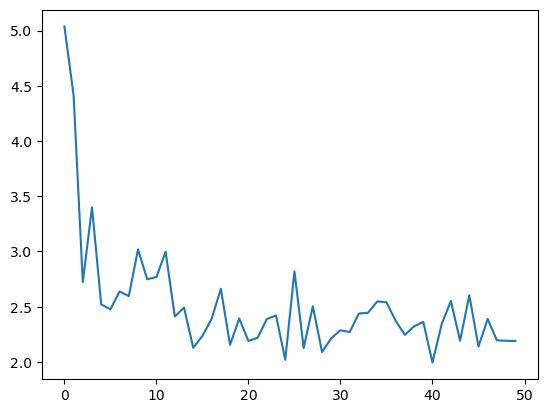

In [28]:
# Code goes here
def steepest_ascent_hill_climbing_with_random_restarts(tsp, numRestarts,problem_size):
    tour_pair = random_tour_pair(problem_size)
    final_tour_pair = steepest_ascent_hill_climbing(tsp,tour_pair)[0]
    minDistance = tour_pair_max_length(tsp,final_tour_pair)
    lowest_pair = final_tour_pair
    for i in range(numRestarts):
        tour_pair = random_tour_pair(problem_size)
        final_tour_pair = steepest_ascent_hill_climbing(tsp,tour_pair)[0]
        newDistance = tour_pair_max_length(tsp,final_tour_pair)
        if newDistance < minDistance:
            minDistance = newDistance
            lowest_pair = final_tour_pair
    return lowest_pair

objFunctions = []
tsp = random_tsp(10)
for i in range(50):
    stahcwrr = steepest_ascent_hill_climbing_with_random_restarts(tsp,i,10)
    objFunctions.append(tour_pair_max_length(tsp,stahcwrr))
plt.plot(range(50),objFunctions)

## Stochastic Hill Climbing [1 Point]

Implement an approach that chooses randomly from among all uphill moves. Measure and report the performance of this on the same 50 random problem instances as was done earlier. Report the average objective function reached over all problem instances, as well as the average number of local moves analyzed.

In [37]:
# Code goes here
def stochastic_hill_climbing(tsp, tour_pair):
    dist=tsp['dist']
    current = tour_pair
    moves = 0
    while True:
        states = generate_states(current)
        uphill_states = []
        for state in states:
            if tour_pair_max_length(tsp,current)>tour_pair_max_length(tsp,state):
                uphill_states.append(state)
        if len(uphill_states)==0:
            return current,moves
        if len(uphill_states)==1:
            current = uphill_states[0]
        else:
            randomInt = np.random.randint(len(uphill_states)-1)
            current = uphill_states[randomInt]
        moves+=1
    return []

=

Instance 1: 4.609226470463575
Instance 2: 2.1248017318065604
Instance 3: 2.1162155676961407
Instance 4: 5.359971944025315
Instance 5: 2.5005567111859093
Instance 6: 2.126906098537004
Instance 7: 6.547246208021795
Instance 8: 3.021562670100767
Instance 9: 2.2388343534427646
Instance 10: 5.141113225387793
Instance 11: 2.260370687563671
Instance 12: 2.360010965460231
Instance 13: 2.76032698986643
Instance 14: 2.598446577757216
Instance 15: 5.097904906122539
Instance 16: 4.6919213367245
Instance 17: 2.5674089451001354
Instance 18: 2.9485045388695688
Instance 19: 2.3463441602463897
Instance 20: 2.4538946829860078
Instance 21: 2.380541778769345
Instance 22: 5.3576531542464165
Instance 23: 2.6249016825773506
Instance 24: 2.6059527008127317
Instance 25: 3.2704399269645106
Instance 26: 3.8314173659101414
Instance 27: 3.593540695424669
Instance 28: 2.424767949289478
Instance 29: 3.4304249121174624
Instance 30: 3.452258488422445
Instance 31: 3.4324300532850427
Instance 32: 2.727988772744791
Insta

## First-choice Hill Climbing [1 Point]

First-choice hill climbing is a type of stochastic hill climbing that generates one random local neighbor at a time and accept it if it has a better objective function value than the current state. Implement this and report the performance of on 50 the same random problem instances. Report the average objective function reached over all problem instances, as well as the average number of local moves analyzed.

In [46]:
# Code goes here
def first_choice_hill_climbing(tsp, tour_pair):
    dist=tsp['dist']
    current = tour_pair
    moves=0
    while True:
        newState = current
        states = generate_states(current)
        np.random.shuffle(states)
        for state in states:
            if tour_pair_max_length(tsp,newState)>tour_pair_max_length(tsp,state):
                newState = state
                moves+=1
                break
        if newState == current:
            return newState,moves
        current = newState
    return []

objFunctions = []


Instance 1: 3.3690516114741915
Instance 2: 4.268606624624954
Instance 3: 3.1228340707877473
Instance 4: 2.058150588872618
Instance 5: 2.7140017116047583
Instance 6: 3.4964972714952753
Instance 7: 3.0651377761552543
Instance 8: 2.2661919918345137
Instance 9: 2.3364034537306866
Instance 10: 5.695405926441175
Instance 11: 2.1749794539164293
Instance 12: 1.8604146038059108
Instance 13: 4.542128405808265
Instance 14: 2.5736755482023805
Instance 15: 5.270175373622192
Instance 16: 2.9946443299086587
Instance 17: 2.9186788204822447
Instance 18: 3.1320582399178436
Instance 19: 5.405393021052284
Instance 20: 1.9488797607111887
Instance 21: 4.522075200821416
Instance 22: 3.968841742903062
Instance 23: 3.5755823583811948
Instance 24: 2.595066580100612
Instance 25: 3.8316749175740306
Instance 26: 6.064878255790088
Instance 27: 5.473592870869176
Instance 28: 4.562216935174574
Instance 29: 4.439430124975037
Instance 30: 6.740621792654243
Instance 31: 3.5655658380929847
Instance 32: 3.843372352470983


## Simulated Annealing [1 Point]

Implement an algorithm that uses simulated annealing to solve the problem, as described in the lectures and book (Section 4.1.2). Experiment with hyperparameters like the temperature schedule and thresholds until you find values that work well.

In [ ]:
# Code goes here
# Classic simulated annealing: T_t = T_0/log(1+t)
# Fast simulated annealing (T_t = T_0/(1+t))
# Exponential cooling (T_t = T_0 a^t)
def classic_anneal(t0,t):
    return t0/(math.log(1+t))

def fast_simualted_anneal(t0,t):
    return t0/(1+t)

def exponential_anneal(t0,t,a=np.random.uniform(0.8,1.0)):
    return t0*(a**t)


def simulated_annealing(tsp, tour_pair, t0, anneal):
    dist = tsp['dist']
    current = tour_pair
    t = 1
    while True:
        if anneal(t0,t) == 0: 
            break
        states = generate_states(current)
        state= np.random.choice(states)
        if(tour_pair_max_length(tsp,state)<tour_pair_max_length(tsp,current)):
            current = state
        else:
            prob = math.exp((tour_pair_max_length(tsp,current)-tour_pair_max_length(tsp,state))/anneal(t0,t))
            if np.random.uniform(0.0,1.0) <= prob:
                current = state
        t+=1
    return current
        
        
        


## Compare Performance [1 Point]

Compare simulated annealing with random restarts and stochastic hill climbing. Analyze which algorithm is better for 10 cities, 20 cities, and 50 cities. To make the comparison fair, try to ensure the time taken for each approach is roughly the same.

For timing you can use the `time` package.

In [ ]:
import time

t0 = time.time()
print("Do something")
t1 = time.time()

print(f"This took: {(t1-t0) * 1e3} milliseconds")

Do something
This took: 0.17380714416503906 milliseconds


In [ ]:
# Code and results go here

## Tour US States [3 points]

Take your best performing approach for 50 cities and try to find the minimum objective value for a modified version of the two salesman problem going around the 48 lower US states. The modification is that both tours must start and end in New York. New York is the only state shared between the two tours.

Each state is considered visited if you can get to its centroid and it is assumed straight line distances between centroids based on GPS coordinates is the way we want to measure distances.

Plot the minimum objective value 2-tsp tours that you find in red and blue, like was done before for the randomly generated points. Print the length of the best tours, as well as the list of indices corresponding to states (Louisiana=0, Maryland=1, ... , see code below).

Loaded from states.pkl
[('Louisiana', 773189.1979394469, -1515002.377525561), ('Maryland', 1979094.0929296287, -383219.5841403244), ('Wisconsin', 789405.1598855292, 7178.093118233844), ('Florida', 1716480.2191801812, -1645210.600897309), ('Georgia', 1548181.6569137496, -1221152.92728593), ('Tennessee', 1227400.6102994615, -915322.7518723847), ('Minnesota', 437251.5679414956, 158022.4684412311), ('Iowa', 536318.2702880212, -303823.8620393781), ('Missouri', 657464.3949930624, -708334.2472004973), ('Michigan', 1154374.0876788201, 31062.850406589027), ('Idaho', -1153546.3198592367, 32306.322358552956), ('California', -1708049.274751084, -667730.6252787685), ('Connecticut', 2216157.7595848595, -1386.5813699763721), ('Texas', 66673.11730108206, -1502504.3982431893), ('Virginia', 1848871.780566167, -594407.8114616707), ('New York', 1957067.0071638965, 68085.33717547444), ('Illinois', 917185.1983259161, -491248.59737063444), ('Montana', -727314.0192655406, 271896.712857685), ('Kentucky', 12904

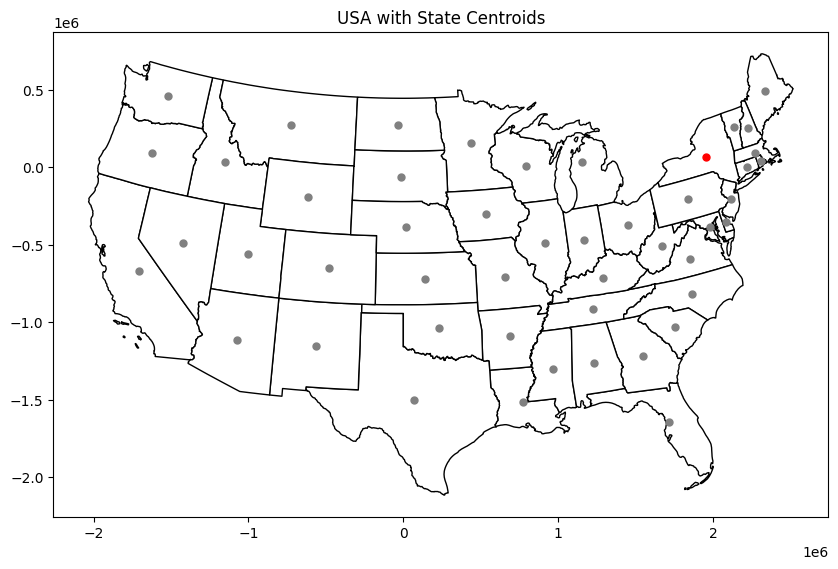

In [ ]:
import geopandas as gpd

def get_state_centroids():

    # load pickled data from states.pkl if it exists
    try:
        states = pd.read_pickle('states.pkl')
        print('Loaded from states.pkl')
    except:
        states = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_20m.zip')

        # pickle (save) the data to states.pkl so we don't need to download in the future
        states.to_pickle('states.pkl')

        print('Downloaded data and saved to states.pkl')

    # Filter out Alaska, Hawaii, and territories
    contiguous_usa = states[~states['STUSPS'].isin(['AK', 'HI', 'PR', 'GU', 'VI', 'MP', 'AS', 'DC'])]

    # Get centroid data
    contiguous_usa = contiguous_usa.to_crs(epsg=2163)
    centroids = contiguous_usa.geometry.centroid
    contiguous_usa['centroid_lon'] = centroids.x
    contiguous_usa['centroid_lat'] = centroids.y

    # Create tuples (state name, x-coordinate, y-coordinate)
    state_tuples = list(zip(contiguous_usa['NAME'], centroids.x, centroids.y))

    return contiguous_usa, state_tuples

def draw_contiguous_usa_map_with_centroids():
    contiguous_usa, state_tuples = get_state_centroids()

    print(state_tuples)
    print(len(state_tuples))

    # Plotting
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    contiguous_usa.plot(ax=ax, color='white', edgecolor='black')

    # Plot centroids
    for statename, x, y in state_tuples:
        color = 'red' if statename == 'New York' else 'grey'
        plt.plot(x, y, marker='o', color=color, markersize=5)

    plt.title("USA with State Centroids")
    plt.show()

draw_contiguous_usa_map_with_centroids()



---
Assignment adapted from [Michael Hahsler](https://github.com/mhahsler/CS7320-AI) under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0/deed.en) license.
